### Pranavraj Thilagaraj, thilagpj@mail.uc.edu

In [135]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree
from IPython.display import SVG
from IPython.display import display
from subprocess import call
import pydotplus
from sklearn.externals.six import StringIO
from sklearn.model_selection import cross_val_score
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import pylab as p1
from sklearn.metrics import confusion_matrix

In [136]:
#read the data 
data = pd.read_csv('downloads/screening_exercise_orders_v201810.csv')

In [137]:
# look at the first 15 entries
data.head(15)

,customer_id,gender,date,value,predicted_gender
0,1000,0,2017-01-01 00:11:31,198.50,1
1,1001,0,2017-01-01 00:29:56,338.00,1
2,1002,1,2017-01-01 01:30:31,733.00,1
3,1003,1,2017-01-01 01:34:22,772.00,1
4,1004,0,2017-01-01 03:11:54,508.00,1
5,1005,1,2017-01-01 10:08:05,338.00,0
6,1006,1,2017-01-01 15:42:57,1526.43,1
7,1007,0,2017-01-01 15:59:50,168.00,0
8,1008,0,2017-01-01 18:01:04,207.99,0
9,1009,1,2017-01-01 19:27:17,283.00,1


In [138]:
# summary statistics
data.describe()

,customer_id,gender,value,predicted_gender
count,13471.000000,13471.000000,13471.000000,13471.000000
mean,5033.693564,0.498256,357.322179,0.642788
std,2500.179222,0.500016,387.210821,0.479196
min,1000.000000,0.000000,0.000000,0.000000
25%,2890.500000,0.000000,161.200000,0.000000
50%,4850.000000,0.000000,258.000000,1.000000
75%,7157.000000,1.000000,426.000000,1.000000
max,9813.000000,1.000000,8046.300000,1.000000


In [139]:
# display number of unique values of each column
data.nunique()

customer_id          8814
gender                  2
date                13461
value                4079
predicted_gender        2
dtype: int64

In [140]:
# quick overview of dataframe (missing values, data types, etc)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13471 entries, 0 to 13470
Data columns (total 5 columns):
customer_id         13471 non-null int64
gender              13471 non-null int64
date                13471 non-null object
value               13471 non-null float64
predicted_gender    13471 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 526.3+ KB


In [141]:
# create a new column called order count, to store number of orders places by each individual customer
data['order_count'] = data.groupby('customer_id')['date'].transform('count')

In [143]:
# sort by customer id and store it into a new dataframe. keeping only the most recent order
data1 = data.sort_values(by=['customer_id', 'date'])
data1 = data1.drop_duplicates(subset=['customer_id'], keep='last')

In [144]:
# dropping irrelevant columns in the new dataframe.
data1 = data1.drop(['value','predicted_gender'],axis=1)

In [145]:
# quick overview of the new dataframe (missing values, data types, etc)
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8814 entries, 0 to 13469
Data columns (total 4 columns):
customer_id    8814 non-null int64
gender         8814 non-null int64
date           8814 non-null object
order_count    8814 non-null int64
dtypes: int64(3), object(1)
memory usage: 344.3+ KB


In [146]:
# renaming data column
data1.rename(columns={'date':'most_recent_order_date'}, inplace=True)

### Answer to question A)

In [147]:
data1.head(10)

,customer_id,gender,most_recent_order_date,order_count
0,1000,0,2017-01-01 00:11:31,1
1,1001,0,2017-01-01 00:29:56,1
1742,1002,1,2017-02-19 21:35:31,3
4323,1003,1,2017-04-26 02:37:20,4
4,1004,0,2017-01-01 03:11:54,1
12953,1005,1,2017-12-16 01:39:27,2
4798,1006,1,2017-05-09 15:27:20,3
7,1007,0,2017-01-01 15:59:50,1
12991,1008,0,2017-12-17 05:47:48,3
9,1009,1,2017-01-01 19:27:17,1


### Answer to question B)

##### Please note as ISO week date is being used automatically by python, the first day of the year is being considered as week 52. 

In [148]:
# changing data column to datetime.
data['date'] = pd.to_datetime(data['date'])

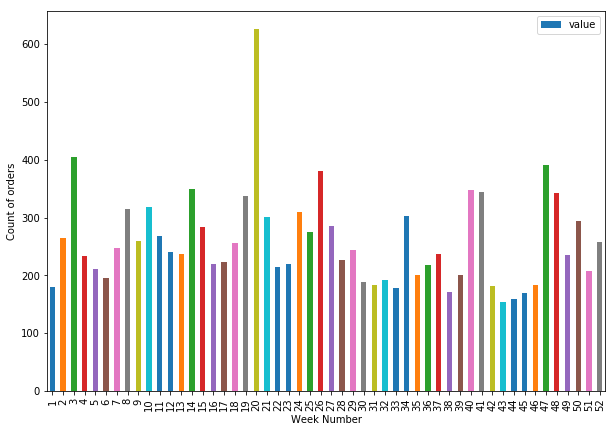

In [164]:
#create new dataframe to store week number and value 
data2 = data.loc[:, ["value"]]
data2["week_no"] = pd.to_datetime(data["date"]).dt.week

# Sum up weekly values
df3 = (
    data2
    .groupby("week_no")
    .count()
    .reset_index()
)

# Plot results
df3.plot.bar(x="week_no", y="value",figsize=(10,7))
plt.xlabel('Week Number')
plt.ylabel('Count of orders')

### Answer to question C)

In [85]:
# group by gender and obtain mean value of purchases. 
data.groupby('gender')['value'].mean()

gender
0    363.890006
1    350.708361
Name: value, dtype: float64

In [87]:
# see what the overall mean value of purchases was. 
data['value'].mean()

357.3221787543603

##### The difference between the mean values for the genders varies by around 13 dollars. This signifies around 3% difference in the value of purchases between the genders. In my opinion, the difference isn't significant enough to help us come up with any hypothesis. 

### Answer to question D)

#### Assuming 0 to signify Male and 1 to signify Female in the Gender column 

In [90]:
# create confusion matrix with true gender and predicter gender
cm = confusion_matrix(data['gender'],data['predicted_gender'])

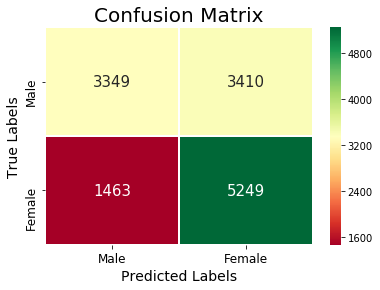

In [166]:
# plot confusion matrix using heatmap function
fig, ax = plt.subplots(figsize=(6,4))  
sns.heatmap(cm, annot = True, linewidths=.5, xticklabels=True, yticklabels=True,cmap='RdYlGn',ax=ax,fmt='g',annot_kws={'size':15});
ax.xaxis.set_ticklabels(['Male', 'Female'], fontsize=12); ax.yaxis.set_ticklabels(['Male', 'Female'], fontsize=12);
ax.set_title('Confusion Matrix', fontsize=20);
ax.set_ylabel('True Labels', fontsize=14);
ax.set_xlabel('Predicted Labels', fontsize=14); 

#### The quality of the prediction needs some improvement. There seem to be quite a few misclassification errors. The model achieves an accuracy of around 64%. In particular, the model seems to have a bias towards predicting females as observed by the number of males who have been misclassified as females. In fact, that number of misclassified males is more than the number of males which have been classified correctly. This is something we will need to be mindful of.

### Answer to question E)

##### One of my favourite tools is something that I only came across quite recently, LIME (local interpretable model-agnostic explanations). LIME basically tries to explain how a black-box Machine learning model ‘thinks’. The output of LIME is a list of explanations, reflecting the contribution of each feature to the prediction of a data sample. It basically helps us answer important questions like - why was this prediction made or which variables caused the prediction? Explanations such as these help us to understand why the model is correct/incorrect. We can learn something new about the problem that would have escaped us without investigating the model.  While I only explored LIME’s applications on a toy dataset (Abalone Age Prediction), it was very fascinating to see its power. In the case of the Abalone dataset, I was able to identify why my model was performing poorly. Upon further investigating the data once again, I was able to identify data recording errors in some of the data points which led to the poor performance. Tools such as this are not perfect, but they go a long way towards helping us understand the model which in turn can allow us to make better decisions which is especially valuable in a business setting. 